In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline

In [2]:
airquality=pd.read_csv("C:/Users/arab/Downloads/airquality.csv")
airquality=airquality[['Ozone','Solar.R','Wind','Temp']]
airquality=airquality.dropna()
airquality['TWcp']=airquality['Temp']*airquality['Wind']
airquality['TWrat']=airquality['Temp']/airquality['Wind']
airquality.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat
0,41.0,190.0,7.4,67,495.8,9.054054
1,36.0,118.0,8.0,72,576.0,9.000000
2,12.0,149.0,12.6,74,932.4,5.873016
3,18.0,313.0,11.5,62,713.0,5.391304
6,23.0,299.0,8.6,65,559.0,7.558140


In [3]:
print('Wind med:  ', airquality.Wind.median())
print('Temp med:  ', airquality.Temp.median())

Wind med:   9.7
Temp med:   79.0


In [4]:
airquality['t_bin'] = pd.cut(airquality.Temp, bins= [0,airquality.Temp.median() , airquality.Temp.max()], labels= ['Low', 'High'])
airquality['w_bin'] = pd.cut(airquality.Wind, bins= [0,airquality.Wind.median() , airquality.Wind.max()], labels= ['Low', 'High'])
airquality.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,t_bin,w_bin
0,41.0,190.0,7.4,67,495.8,9.054054,Low,Low
1,36.0,118.0,8.0,72,576.0,9.000000,Low,Low
2,12.0,149.0,12.6,74,932.4,5.873016,Low,High
3,18.0,313.0,11.5,62,713.0,5.391304,Low,High
6,23.0,299.0,8.6,65,559.0,7.558140,Low,Low


In [5]:
model = smf.ols(formula= 'Ozone ~ t_bin + w_bin', data= airquality).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     44.86
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           6.57e-15
Time:                        19:30:53   Log-Likelihood:                -512.47
No. Observations:                 111   AIC:                             1031.
Df Residuals:                     108   BIC:                             1039.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.2160      4.547      7.966

In [6]:
print(model.pvalues)

Intercept        1.799014e-12
t_bin[T.High]    1.252265e-09
w_bin[T.High]    3.879387e-05
dtype: float64


In [7]:
print(airquality.Wind.min(),airquality.Wind.max())

2.3 20.7


In [8]:
print(airquality.Temp.min(),airquality.Temp.max())

57 97


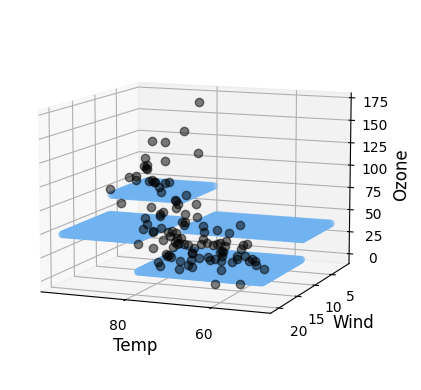

In [10]:
x1 = np.linspace(50, 100, 100)
x1_bin = pd.cut(x1, bins=[0, np.median(airquality['Temp']), np.max(airquality['Temp'])], labels=['Low', 'High'])

x2 = np.linspace(1, 24, 100)
x2_bin = pd.cut(x2, bins=[0, np.median(airquality['Wind']), np.max(airquality['Wind'])], labels=['Low', 'High'])

Temp, Wind = np.meshgrid(x1, x2)
t_bin, w_bin = np.meshgrid(x1_bin, x2_bin)

X_3d = np.array([Temp.flatten(), Wind.flatten()]).T
X_bin_3d = np.array([t_bin.flatten(), w_bin.flatten()]).T

X_bin_3d = pd.DataFrame(X_bin_3d, columns = ['t_bin', 'w_bin'])
preds_3d = model.predict(X_bin_3d)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')

ax.plot(airquality['Temp'], airquality['Wind'], airquality['Ozone'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(Temp.flatten(), Wind.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax.set_xlabel('Temp', fontsize=12)
ax.set_ylabel('Wind', fontsize=12)
ax.set_zlabel('Ozone', fontsize=12)

ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

ax.view_init(elev=10, azim=112)

fig.tight_layout()

In [11]:
model1 = smf.ols(formula= 'Ozone ~ t_bin + w_bin + t_bin : w_bin', data= airquality).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     32.58
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           4.85e-15
Time:                        19:31:25   Log-Likelihood:                -510.02
No. Observations:                 111   AIC:                             1028.
Df Residuals:                     107   BIC:                             1039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [12]:
print(model1.pvalues)

Intercept                      1.603841e-07
t_bin[T.High]                  3.263111e-09
w_bin[T.High]                  9.522531e-02
t_bin[T.High]:w_bin[T.High]    3.006949e-02
dtype: float64


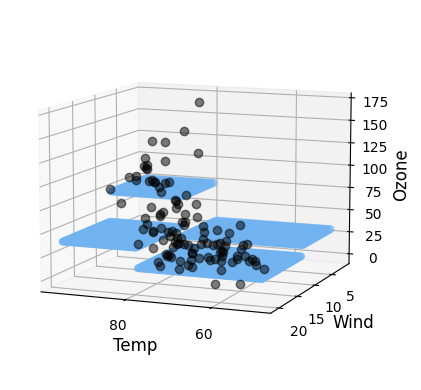

In [13]:
x1 = np.linspace(50, 100, 100)
x1_bin = pd.cut(x1, bins=[0, np.median(airquality['Temp']), np.max(airquality['Temp'])], labels=['Low', 'High'])

x2 = np.linspace(1, 24, 100)
x2_bin = pd.cut(x2, bins=[0, np.median(airquality['Wind']), np.max(airquality['Wind'])], labels=['Low', 'High'])

Temp, Wind = np.meshgrid(x1, x2)
t_bin, w_bin = np.meshgrid(x1_bin, x2_bin)

X_3d = np.array([Temp.flatten(), Wind.flatten()]).T
X_bin_3d = np.array([t_bin.flatten(), w_bin.flatten()]).T

X_bin_3d = pd.DataFrame(X_bin_3d, columns = ['t_bin', 'w_bin'])
preds_3d = model1.predict(X_bin_3d)

plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')

ax.plot(airquality['Temp'], airquality['Wind'], airquality['Ozone'], color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(Temp.flatten(), Wind.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax.set_xlabel('Temp', fontsize=12)
ax.set_ylabel('Wind', fontsize=12)
ax.set_zlabel('Ozone', fontsize=12)

ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

ax.view_init(elev=10, azim=112)

fig.tight_layout()